# Polynomial Linear Regression

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/bestecetin/Desktop/machine_learning/courses/machinelearning/Regression/PolynomialLinearRegression/data/polynomial+regression.csv",sep=";")

In [3]:
y = df.araba_max_hiz.values.reshape(-1,1) #values series'i numpy arraye çeviriyordu reshape ise size'ın sağ tarafına
# bir ekliyordu mesela (14,1) 
x = df.araba_fiyat.values.reshape(-1,1)

şuan x ve y olarak iki arrayim var biri arabamın max hızı diğeri ise fiyatı

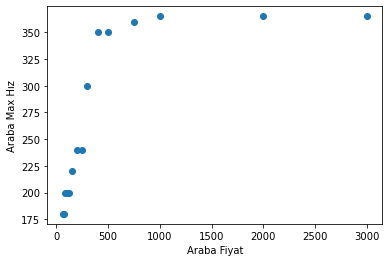

In [4]:
plt.scatter(x,y)
plt.ylabel("Araba Max Hız")
plt.xlabel("Araba Fiyat")
plt.show()

- data linear bir şekilde artıp tekrardan sabit bir şekilde artıyor <br>
- linear regression = y=b0+b1*x <br>
- multiple lr = y= b0 + b1 * x1 + b2 * x2 idi <br>
- şuanda benim bir dizi bağımsız değişkenim olmadığı için linear regression uygulayacağım..

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y) #sample'lara en uygun line'ı uyduruyoruz.
#en uygunu ise MSE en az olacak şekilde yapıyor.

LinearRegression()

fit ettiğim line'ı görselleştirelim : 

In [6]:
y_pred = lr.predict(x)

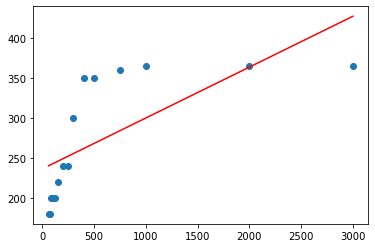

In [7]:
plt.plot(x,y_pred, color="red")
plt.scatter(x,y)
plt.show()

In [8]:
lr.predict([[10000]]) 

array([[871.66401826]])

arabamın fiyatına göre bir uçağın hızı kadar hız gösterdi, çünkü
bu veriseti linear regression modeline uygun değil.

Polynomial Linear Regression = y = b0 + b1 * x + b2 * x^2 + b3 * x^3 ... bn * x^n

benim modelim linear regressiona uygun değilse yukarıdaki formüldeki gibi bir sayının karesini almak demek onu eğrileştirmek demektir. Biz bu formül sayesinde doğrumuzu eğrileştirebiliyoruz.

peki neden hala polynomial'de olsa linear diyoruz çünkü b0 ve b1'im linear x'in katsayıları sadece polynomial oldu.

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
polynomial_regression = PolynomialFeatures(degree=4) 

- degree=2 formüldeki n degerinin 2 olması anlamına gelir yani, 
- y = b0 + b1 * x + b2 * x^2

ama benim x'im veri setinde arabanın fiyatıydı ve araba fiyatının karesi olarak bir featureum yoktu bu yüzden : 

In [21]:
x_polynomial = polynomial_regression.fit_transform(x)

In [22]:
x_polynomial

array([[1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07],
       [1.0000000e+00, 7.0000000e+01, 4.9000000e+03, 3.4300000e+05,
        2.4010000e+07],
       [1.0000000e+00, 8.0000000e+01, 6.4000000e+03, 5.1200000e+05,
        4.0960000e+07],
       [1.0000000e+00, 1.0000000e+02, 1.0000000e+04, 1.0000000e+06,
        1.0000000e+08],
       [1.0000000e+00, 1.2000000e+02, 1.4400000e+04, 1.7280000e+06,
        2.0736000e+08],
       [1.0000000e+00, 1.5000000e+02, 2.2500000e+04, 3.3750000e+06,
        5.0625000e+08],
       [1.0000000e+00, 2.0000000e+02, 4.0000000e+04, 8.0000000e+06,
        1.6000000e+09],
       [1.0000000e+00, 2.5000000e+02, 6.2500000e+04, 1.5625000e+07,
        3.9062500e+09],
       [1.0000000e+00, 3.0000000e+02, 9.0000000e+04, 2.7000000e+07,
        8.1000000e+09],
       [1.0000000e+00, 4.0000000e+02, 1.6000000e+05, 6.4000000e+07,
        2.5600000e+10],
       [1.0000000e+00, 5.0000000e+02, 2.5000000e+05, 1.2500000e+08,
        6.25

burada 1'ler x^0'ı(gorunmeyen) ikinci sutun x^1'i ucuncu sutun x^2'yi temsil ediyor

In [23]:
#fit
linear_regression2 = LinearRegression()
linear_regression2.fit(x_polynomial,y)

LinearRegression()

In [24]:
y_head2 = linear_regression2.predict(x_polynomial)

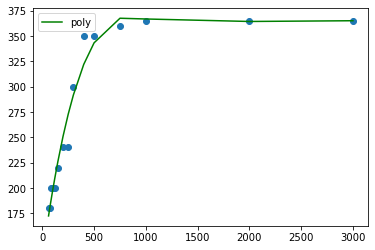

In [25]:
plt.plot(x,y_head2,color= "green", label="poly")
plt.scatter(x,y)
plt.legend()
plt.show()


degree=2 vermiştim 4 vererek , degree derecesini arttırarak daha iyi uyan bir model elde ettim. MSE'ü azaltmış oldum.  